In [1]:
import torch
import torch.nn as nn
#from torch.nn import Module, Linear
import numpy as np
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import random
#from matplotlib import pyplot as plt
%matplotlib inline

show dataset

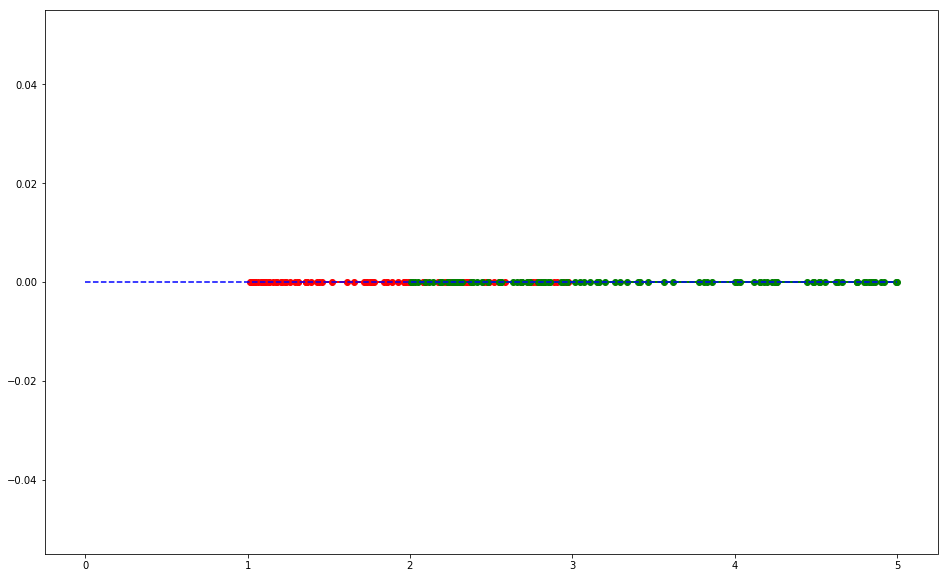

In [2]:
import random
from matplotlib import pyplot as plt
f = plt.figure(figsize=(16,10))
M = 100
a_list = [random.uniform(1,3) for i in range(M)]
b_list = [random.uniform(2,5) for i in range(M)]   

ax3 = f.add_subplot(111)
ax3.plot(a_list,np.zeros(len(a_list)),marker='o',color='r')
ax3.plot(b_list,np.zeros(len(b_list)),marker='o',color='g')
ax3.plot([0,5],[0,0],color='b',linestyle='--') 

In [3]:
a_dataset = np.array(a_list)
print (a_dataset.flatten())
b_dataset = np.array(b_list)
print (b_dataset)

[1.72910016 1.73591742 1.65734361 2.48079694 2.47167498 2.01496202
 2.32512823 2.31018494 1.88829409 1.2890372  1.98729752 1.12981424
 2.94843503 2.90650337 1.36069667 1.03336569 2.96286805 1.52274813
 2.79714888 2.38480028 1.75469588 1.17645896 2.72816086 2.08193456
 1.09838609 1.76861878 1.76339646 1.96740585 1.0117214  2.89042155
 1.30869161 1.04516688 2.51956842 1.04122881 2.17183523 2.48733998
 1.78004975 1.10990144 1.2147433  1.08662319 2.2691172  1.04656395
 2.73666837 1.22829488 1.18203183 1.71642486 2.54906664 2.18581165
 2.00551924 2.58437549 1.85869558 1.43757029 2.82801499 2.21392594
 1.11501161 1.08449934 1.23925886 2.36239423 2.34539258 2.00635798
 2.75908201 1.13484883 2.68627776 1.96645818 1.85644987 2.24216361
 1.36395367 2.4538378  1.02959648 1.35785997 2.97173843 1.2068391
 2.34882994 1.39060481 1.42537942 1.96698742 2.23987351 1.02343657
 1.15853582 1.45767565 1.75850447 2.77790526 2.26563367 2.08788339
 1.99763231 2.47989662 1.09757408 2.97146947 1.31209196 1.92439

In [4]:
class Mlp(nn.Module):
    def __init__(self):
        super(Mlp, self).__init__()
        self.fc1 = nn.Linear(1,1000)
        self.fc2 = nn.Linear(1000,2)
    def foward(self,x):
        x = F.relu(self.fc1(a))
        x = F.relu(self.fc2(x))
        return F.log_softmax(x,dim=1)

In [36]:
real = a_dataset.flatten()
fake = b_dataset.flatten()
samples = np.concatenate((real, fake))

left, right = samples.min(), samples.max()
#print (samples.min())
#print (samples.max())
margin = (right - left) / 10
#print (margin)
#print (left - margin)
#print (right + margin)
left -= margin
right += margin
#print (left)

#print (right)

test_pts = np.linspace(left, right, 1).astype('float32')
test_pts_t = torch.from_numpy(test_pts.reshape(-1, 1))
print (test_pts)
print (test_pts_t)
print (Variable(test_pts_t))
#print (test_pts)
model = Mlp()
#print (test_pts.shape)
#scores = model(Variable(test_pts_t)).data.cpu().numpy().flatten()

#scores = model(10)

[0.61312604]
tensor([[ 0.6131]])
tensor([[ 0.6131]])


In [5]:
is_cuda = False
if torch.cuda.is_available():
    is_cuda = True

model = Mlp()
if is_cuda:
    model.cuda()

In [21]:
bs = len(real)
print (bs)
ones_label  = torch.ones(bs, 1)
#print (ones_label)
zeros_label = torch.zeros(bs, 1)

100


In [64]:
#def weights_init_msra(m):
    """
    Modified version of msra init
    """
#    classname = m.__class__.__name__
#    if classname.find('Linear') != -1:
#        m.weight.data.normal_(0.0, np.sqrt(2.0 / m.in_features))
#        m.bias.data.fill_(0.02)
#    elif classname.find('BatchNorm') != -1:
#        m.weight.data.normal_(1.0, 0.02)
#        m.bias.data.fill_(0.0)

In [6]:
def weights_init(m):
    classname = m.__class__.__name__
    m.weight.data.normal_(0.0, np.sqrt(2.0 / m.in_features))
    m.bias.data.fill_(0.02)

In [ ]:
def train_discriminator(net, real_dataset, fake_dataset):
    real = real_dataset.flatten()
    fake = fake_dataset.flatten()
    samples = np.concatenate((real, fake))
    bs = len(real)
    ones_label  = torch.ones(bs, 1)
    zeros_label = torch.zeros(bs, 1)
    
    #net.apply(weights_init)
    optimizer   = optim.Adam(net.parameter(), lr=0.01, betas=(0.5, 0.9))
    prob_D_real, prob_D_fake = 0., 0.
    
    left, right = samples.min(), samples.max()
    margin = (right - left) / 10
    left -= margin
    right += margin

    test_pts = np.linspace(left, right, 1000).astype('float32')
    test_pts_gpu = torch.from_numpy(test_pts.reshape(-1, 1)).cuda()
    
    for it in range(1, 10001):
        net.zero_grad()
        x_real = Variable(torch.from_numpy(real.astype('float32')))
        x_fake = Variable(torch.from_numpy(fake.astype('float32')))
        
        loss_real = loss(net(x_real), Variable(ones_label))
        loss_fake = loss(net(x_fake), Variable(zeros_label))
        
        loss_real.backward()
        loss_fake.backward()
        
        prob_real += np.exp(-loss_real.data[0])
        prob_fake += 1 - np.exp(-loss_fake.data[0])
        
        
        
        if it % 100 == 0 or it == 1:
            prob_real /= 100
            prob_fake /= 100
            fig_w, fig_h, dpi = 800, 600, 100
            titlestr = f'iter {it}/{iteration}, probability for real: {prob_D_real:.7}, fake: {prob_D_fake:.7}'
            print(titlestr)
            fig = plt.figure(figsize=(fig_w/dpi, fig_h/dpi), dpi=dpi)
            ax  = fig.add_subplot(111)
            
            real_sample = real.flatten()
            fake_sample = fake.flatten()

            scores = net(Variable(test_pts_gpu)).data.cpu().numpy()

            ax.scatter(real_sample, np.zeros(real_sample.shape), c='red', marker='+', s=100, label='real')
            ax.scatter(fake_sample, np.zeros(fake_sample.shape), c='blue', marker='x', s=100, label='fake')
            ax.plot(test_pts, scores)
            plt.ylim([-0.1, 1.1])
            plt.xlim([left, right])

            plt.xticks(fontsize=12)
            plt.yticks(fontsize=12)
            plt.title(titlestr, fontsize=12)
            plt.legend(loc=2, fontsize=12)
            plt.tight_layout()
            plt.savefig(f'{workdir}/{it:06}.png')

            plt.close('all')

            prob_D_real = 0.
            prob_D_fake = 0.

In [ ]:
def get_discriminator():
    return Mlp()

In [ ]:
if __name__ == "__main__":
    netD = get_discriminator()
    print(netD)

    train_discriminator(netD, a_dataset, b_dataset)

In [14]:
def train_discriminator(D, real_dataset, fake_dataset, iteration=10000, draw_iter=100, lr=0.0001):

    real_sample = real_dataset.flatten()
    fake_sample = fake_dataset.flatten()
    samples = np.concatenate((real_sample, fake_sample))

    left, right = samples.min(), samples.max()
    margin = (right - left) / 10
    left -= margin
    right += margin

    test_pts = np.linspace(left, right, 1000).astype('float32')
    test_pts_gpu = torch.from_numpy(test_pts.reshape(-1, 1)).cuda()

    bs = real_dataset.shape
    D.apply(weights_init_msra)
    D = D.cuda()

    optimizer   = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.9))
    ones_label  = torch.ones(bs, 1).cuda()
    zeros_label = torch.zeros(bs, 1).cuda()
    loss        = nn.BCELoss()

    prob_D_real, prob_D_fake = 0., 0.
    for it in range(1, iteration + 1):
        D.zero_grad()
        # Sample data
        x_fake = Variable(torch.from_numpy(fake_dataset.batch_next().astype('float32'))).cuda()
        x_real = Variable(torch.from_numpy(real_dataset.batch_next().astype('float32'))).cuda()

        loss_fake = loss(D(x_fake), Variable(zeros_label))
        loss_real = loss(D(x_real), Variable(ones_label))

        loss_fake.backward()
        loss_real.backward()

        prob_D_real += np.exp(-loss_real.data[0])
        prob_D_fake += 1 - np.exp(-loss_fake.data[0])

        optimizer.step()

        if it % draw_iter == 0 or it == 1:
            prob_D_real /= draw_iter
            prob_D_fake /= draw_iter

            fig_w, fig_h, dpi = 800, 600, 100

            titlestr = f'iter {it}/{iteration}, probability for real: {prob_D_real:.7}, fake: {prob_D_fake:.7}'
            print(titlestr)

            fig = plt.figure(figsize=(fig_w/dpi, fig_h/dpi), dpi=dpi)
            ax  = fig.add_subplot(111)

            real_sample = real_dataset.batch_next(32).flatten()
            fake_sample = fake_dataset.batch_next(32).flatten()

            scores = D(Variable(test_pts_gpu)).data.cpu().numpy().flatten()

            ax.scatter(real_sample, np.zeros(real_sample.shape), c='red', marker='+', s=100, label='real')
            ax.scatter(fake_sample, np.zeros(fake_sample.shape), c='blue', marker='x', s=100, label='fake')
            ax.plot(test_pts, scores)
            plt.ylim([-0.1, 1.1])
            plt.xlim([left, right])

            plt.xticks(fontsize=12)
            plt.yticks(fontsize=12)
            plt.title(titlestr, fontsize=12)
            plt.legend(loc=2, fontsize=12)
            plt.tight_layout()
            plt.savefig(f'{workdir}/{it:06}.png')

            plt.close('all')

            prob_D_real = 0.
            prob_D_fake = 0.